# Дипломная работа по Python

### 1. Загрузить файл HR.csv в pandas dataframe

In [1]:
import pandas as pd

In [2]:
data_hr = pd.read_csv('HR.csv')
data_hr.info() # видим, что нет пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

In [3]:
# основные статистики (mean, std, min, max, mediana (50%)) для количественных данных позволяет рассчитать метод describe()
data_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# для качественных данных есть смысл рассчитывать только моду
print('Отдел, в котором работает наибольшее количество сотрудников:', data_hr.department.mode()[0])
print('Наиболее часто встречаемый уровень зарплат:', data_hr.salary.mode()[0])

Отдел, в котором работает наибольшее количество сотрудников: sales
Наиболее часто встречаемый уровень зарплат: low


### 3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определить две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
data_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df = data_hr.iloc[:, 0:8]  # оставляем только количественные переменные

Вариант 1.

Text(0.5, 1.0, 'Correlation Matrix')

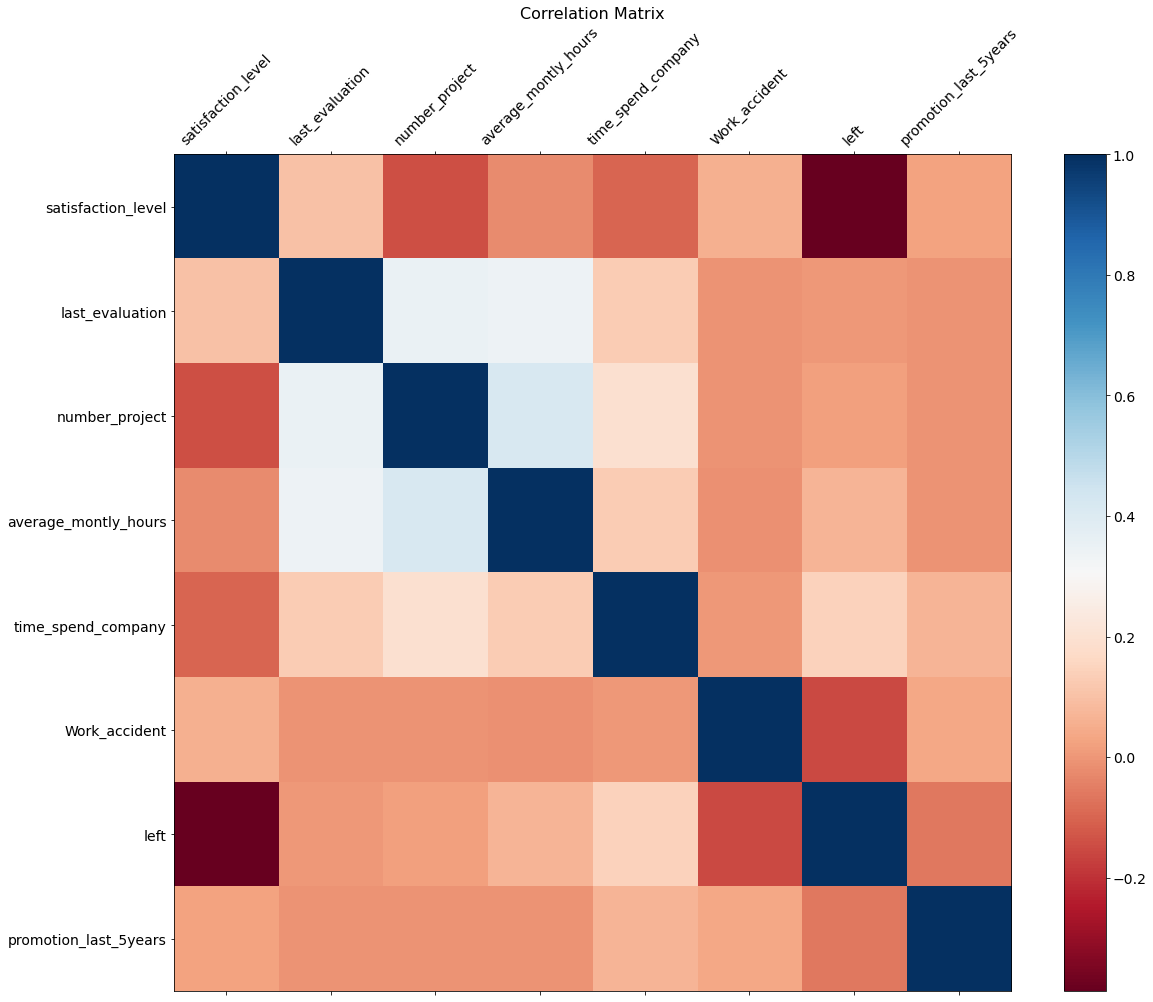

In [7]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number, cmap='RdBu')
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

Вариант 2.

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


Ответ: 
- самые скоррелированные переменные - average_monthly_hours (среднее количество часов на рабочем месте в месяц) и number_project (количество проектов, выполненных за время работы)
- наименее скоррелированные переменные - work_accident (происходили ли несчастные случаи на рабочем месте с сотрудником) и time_spend_company (стаж работы в компании в годах)

### 4. Рассчитать, сколько сотрудников работает в каждом департаменте.

In [9]:
# в расчете работающих сотрудников в каждом департаменте учитывать уволившихся не будем 
df_vc = data_hr[data_hr.left == 0].department.value_counts().rename_axis('unique_values').to_frame('counts')

for i in range(len(df_vc)):
    print(f'{i+1}. В департаменте {df_vc.index[i]} работает {df_vc.counts[i]} сотруника(ов)')

1. В департаменте sales работает 3126 сотруника(ов)
2. В департаменте technical работает 2023 сотруника(ов)
3. В департаменте support работает 1674 сотруника(ов)
4. В департаменте IT работает 954 сотруника(ов)
5. В департаменте product_mng работает 704 сотруника(ов)
6. В департаменте RandD работает 666 сотруника(ов)
7. В департаменте marketing работает 655 сотруника(ов)
8. В департаменте accounting работает 563 сотруника(ов)
9. В департаменте management работает 539 сотруника(ов)
10. В департаменте hr работает 524 сотруника(ов)


### 5. Показать распределение сотрудников по зарплатам.

<AxesSubplot:title={'center':'РАСПРЕДЕЛЕНИЕ СОТРУДНИКОВ ПО ЗАРПЛАТАМ'}, xlabel='Уровень зарплаты', ylabel='Количество сотрудников, чел.'>

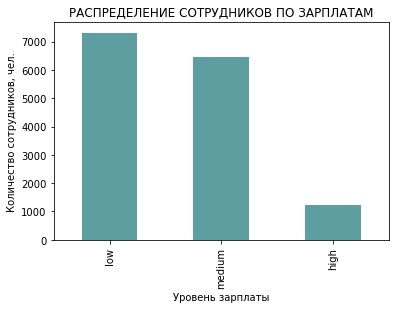

In [10]:
# для данного графика исключать уволившихся сотрудников не будем
data_hr.salary.value_counts().plot(kind='bar', 
                    title='РАСПРЕДЕЛЕНИЕ СОТРУДНИКОВ ПО ЗАРПЛАТАМ',
                    xlabel='Уровень зарплаты',
                    ylabel='Количество сотрудников, чел.',
                    color='cadetblue')

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

<AxesSubplot:title={'center':'РАСПРЕДЕЛЕНИЕ СОТРУДНИКОВ ПО ЗАРПЛАТАМ И ДЕПАРТАМЕНТАМ'}, xlabel='department'>

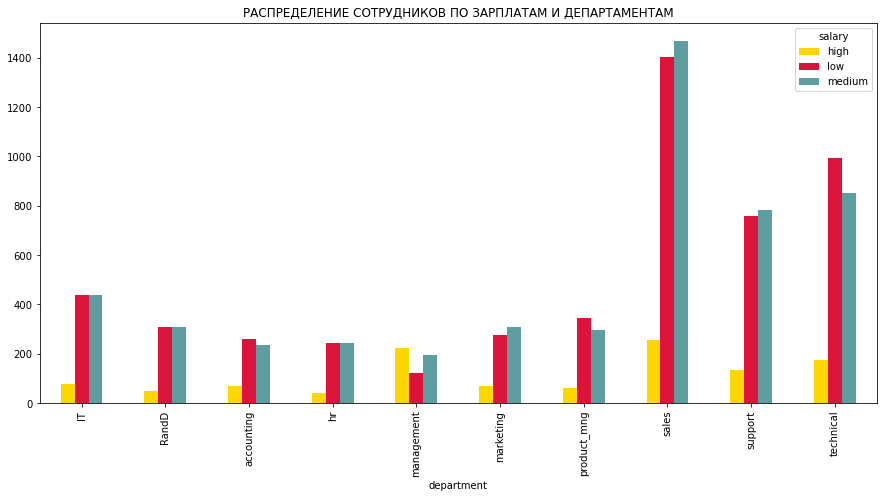

In [11]:
# на данном графике покажем распределение только работающих сотрудников, т.е. зп уволившихся учитывать не будем
# проведем расчет количества сотрудников по уровню зарплаты для каждого департамента
df2_vc = data_hr[data_hr.left == 0].iloc[:, 8:10].value_counts().rename_axis(['department','salary']).to_frame('counts')
df2_vc = df2_vc.reset_index(level=['department', 'salary'])

# построим график
df_dep_sal = df2_vc.pivot(index='department', columns='salary', values='counts')
df_dep_sal.plot(kind='bar', 
                color=['gold', 'crimson', 'cadetblue'], 
                title='РАСПРЕДЕЛЕНИЕ СОТРУДНИКОВ ПО ЗАРПЛАТАМ И ДЕПАРТАМЕНТАМ',
                figsize=(15,7))

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [12]:
# подготовим массивы
workers_low_salary = data_hr[data_hr.salary == 'low'].iloc[:, 3]
workers_high_salary = data_hr[data_hr.salary == 'high'].iloc[:, 3]

Cформулируем нулевую и альтернативную гипотезы:
- Н0: среднее время, которое проводят на работе сотрудники с высоким окладом и с низким окладом, одинаковое
- Н1: среднее время, которое проводят на работе сотрудники с высоким окладом и с низким окладом, отличается

За alpha будем принимать 0.05

Сравниваем две независимые выборки, нужен двухвыборочный двухсторонний критерий, будем использовать Welch's Test.

In [13]:
from scipy import stats as st
alpha = 0.05

stat, pvalue = st.ttest_ind(workers_low_salary, workers_high_salary, equal_var=False)

print('Среднее время, которое проводят на работе сотрудники с низким окладом:', round(workers_low_salary.mean(), 2))
print('Среднее время, которое проводят на работе сотрудники с высоким окладом:', round(workers_high_salary.mean(), 2))
print('-----')
print('Statistics=%.3f, pvalue=%.3f' % (stat, pvalue))

if pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, сотрудники с низким и высоким окладом проводят на работе разное количество времени')
else:
    print('Не отвергаем нулевую гипотезу, сотрудники с низким и высоким окладом проводят на работе в среднем равное количество времени')

Среднее время, которое проводят на работе сотрудники с низким окладом: 201.0
Среднее время, которое проводят на работе сотрудники с высоким окладом: 199.87
-----
Statistics=0.762, pvalue=0.446
Не отвергаем нулевую гипотезу, сотрудники с низким и высоким окладом проводят на работе в среднем равное количество времени


Ответ: результаты теста показали, что нет оснований предполагать, что сотрудники, получающие высокий оклад, проводят на работе больше времени, чем сотрудники с низким окладом, но есть все основания считать, что эти сотрудники тратят в среднем равное количество часов на рабочем месте в месяц.

### 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [14]:
workers_ = data_hr[data_hr.left == 0]
workers_left = data_hr[data_hr.left == 1]

1. Показатели среди уволившихся сотрудников:

In [15]:
print('● Доля сотрудников с повышением за последние 5 лет:',round(len(workers_left[workers_left.promotion_last_5years == 1]) / len(workers_left),2))
print('● Средняя степень удовлетворенности:',round(workers_left.satisfaction_level.mean(),2))
print('● Среднее количество проектов:',round(workers_left.number_project.mean(),0))

● Доля сотрудников с повышением за последние 5 лет: 0.01
● Средняя степень удовлетворенности: 0.44
● Среднее количество проектов: 4.0


2. Показатели среди неуволившихся сотрудников:

In [16]:
print('● Доля сотрудников с повышением за последние 5 лет:',round(len(workers_[workers_.promotion_last_5years == 1]) / len(workers_),2))
print('● Средняя степень удовлетворенности:',round(workers_.satisfaction_level.mean(),2))
print('● Среднее количество проектов:',round(workers_.number_project.mean(),0))

● Доля сотрудников с повышением за последние 5 лет: 0.03
● Средняя степень удовлетворенности: 0.67
● Среднее количество проектов: 4.0


### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволится ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.

In [17]:
data_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
df = data_hr.iloc[:, 0:8]  # оставляем только количественные переменные

# разделяем данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns!='left'], df.left, test_size=0.30, random_state=42)

In [19]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)

# определяем точность прогноза 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7557777777777778

In [20]:
# Опишем результаты при помощи confusion_matrix и classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3138,  290],
       [ 809,  263]])

In [21]:
from sklearn.metrics import classification_report
print('Classification Report : ')
print (classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.48      0.25      0.32      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500



Вывод: всего было 3138 истинных положительных результатов, 290 ложных положительных результатов, 809 ложных отрицательных и 263 истинных отрицательных. Precision (0.48) говорит нам, что в 48% случаев модель распознает, уволится ли сотрудник. Recall (0.25) говорит нам, что в 75% случаев модель посчитает, что сотрудник, не намеренный увольняться, уволится.